In [1]:
from UTILITY_quickstart import *

In [2]:
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-14_twoBunch_baseline.yml")
#importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline2.yml")

#New DL10 centering 
#importedDefaultSettings = importedDefaultSettings | {"centerDL10" : True}

In [3]:
csrTF = False
evalElement = "PENT"


inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]
tao = initializeTao(
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e4,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

setLattice(tao, **importedDefaultSettings)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 10000.0
Beam created, written to /tmp/beams/activeBeamFile_2216965272863809824.h5, and reinit to tao


In [4]:
trackBeam(tao, 
          **importedDefaultSettings,
          verbose = True
         )

Loaded /tmp/beams/activeBeamFile_2216965272863809824.h5
Set track_start = L0AFEND, track_end = end
Tracking!
trackBeam() exiting


In [5]:
totalNumElements = len(tao.lat_list("*", "ele.name"))
combinedElementData = [
    {
        "eleII" : eleII,
        "name" : tao.ele_head(eleII)["name"],
        "key" : tao.ele_head(eleII)["key"],
        "s" : tao.ele_head(eleII)["s"]
    }
    for eleII in range(totalNumElements) 
]

#Keep only elements after L0AFEND
combinedElementData = [ele for ele in combinedElementData if ele["s"] > 4.1274477]



allMarkerElements     = [ ele for ele in combinedElementData if ele["key"] == "Marker"   ]

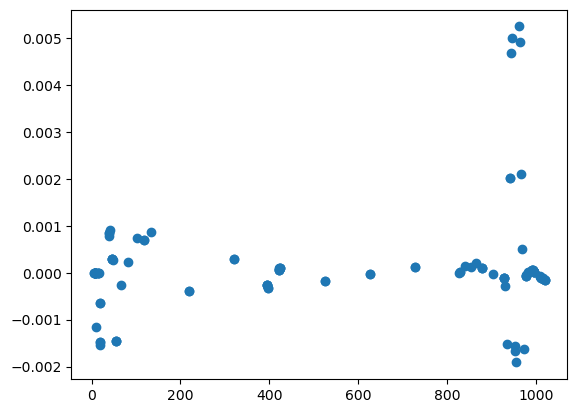

In [6]:
plt.scatter(
    [ ele["s"] for ele in allMarkerElements ],
    [ np.median( getBeamAtElement( tao, ele["eleII"] )["x"] ) for ele in allMarkerElements ]
)

In [7]:
print( 1e6 * np.median( getBeamAtElement(tao, "BEGBC20")["x"] ) )
print( 1e6 * np.median( getBeamAtElement(tao, "BEGBC20")["xp"] ) )

print( 1e6 * np.median( getBeamAtElement(tao, "BEGBC20")["y"] ) )
print( 1e6 * np.median( getBeamAtElement(tao, "BEGBC20")["yp"] ) )

print( 1e-9 * np.median( getBeamAtElement(tao, "BEGBC20")["energy"] ) )

-102.8324462854409
3.695615087840808
0.35690810504507287
-0.014897674820611278
9.860528807577358


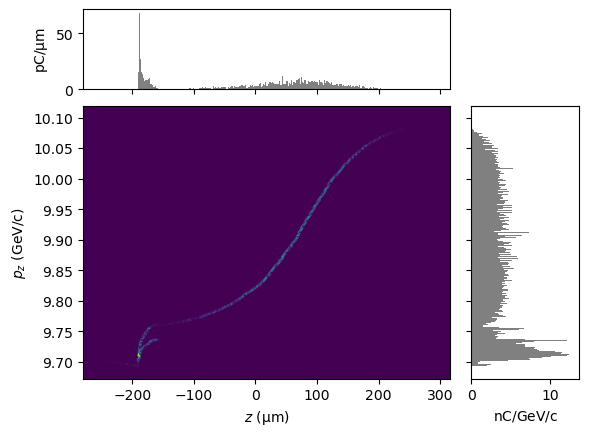

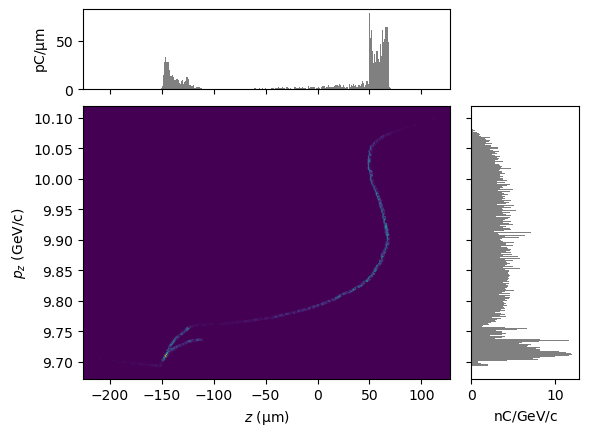

In [8]:
P = getBeamAtElement(tao, "BEGBC20")
display(plotMod(P, 'z', 'pz', bins=300))
P = getBeamAtElement(tao, "PENT")
display(plotMod(P, 'z', 'pz', bins=300))
plt.clf()

In [9]:
#tao.cmd("show ele PENT -all")

## Apply misalignments and steer

In [10]:
#with open('./other_configs/pinkCurveMisalignments.json', 'r') as f:
#with open('./other_configs/blueCurveMisalignments.json', 'r') as f:
with open('./other_configs/winter2025BBAMisalignments.json', 'r') as f:
    misalignmentConfig = json.load(f)

applyOtherConfig(tao, misalignmentConfig) 


# with open('./other_configs/2025-06-12_pinkCurveSteering.json', 'r') as f:
#     steeringConfig = json.load(f)

# with open('./other_configs/2025-06-13_pinkCurveSteering_2024-10-14_twoBunch_baseline.json', 'r') as f:
#     steeringConfig = json.load(f)

# applyOtherConfig(tao, steeringConfig) 

# with open('./other_configs/2025-06-13_pinkCurveSteering_2024-10-14_twoBunch_baseline_supplement.json', 'r') as f:
#     steeringSupplementConfig = json.load(f)

# applyOtherConfig(tao, steeringSupplementConfig) 


#with open('./other_configs/2025-06-13_pinkCurveSteering_2024-10-14_twoBunch_baseline_extended.json', 'r') as f:
#with open('./other_configs/2025-06-13_blueCurveSteering_2024-10-14_twoBunch_baseline_extended.json', 'r') as f:
with open('./other_configs/2025-06-13_winter2025BBASteering_2024-10-14_twoBunch_baseline_extended.json', 'r') as f:
    steeringConfig = json.load(f)

applyOtherConfig(tao, steeringConfig) 

In [11]:
trackBeam(tao, 
          #trackEnd = "BEGBC20",
          **importedDefaultSettings,
          verbose = True
         )

Loaded /tmp/beams/activeBeamFile_2216965272863809824.h5
Set track_start = L0AFEND, track_end = end
Tracking!
trackBeam() exiting


In [12]:
print( 1e6 * np.median( getBeamAtElement(tao, "BEGBC20")["x"] ) )
print( 1e6 * np.median( getBeamAtElement(tao, "BEGBC20")["xp"] ) )

print( 1e6 * np.median( getBeamAtElement(tao, "BEGBC20")["y"] ) )
print( 1e6 * np.median( getBeamAtElement(tao, "BEGBC20")["yp"] ) )

print( 1e-9 * np.median( getBeamAtElement(tao, "BEGBC20")["energy"] ) )

3.658824498707367
-8.695359815914037
1.8631074233931086
-3.94376536252884
9.860493393273519


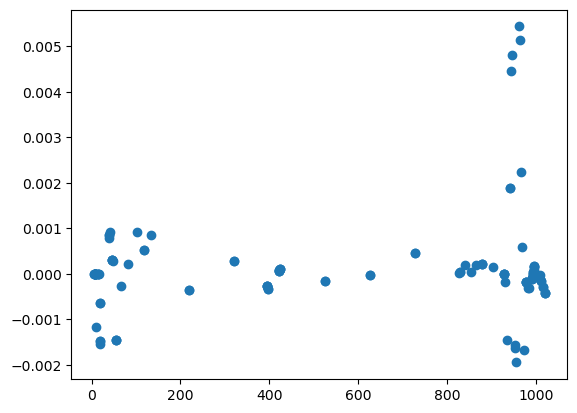

In [13]:

plt.scatter(
    [ ele["s"] for ele in allMarkerElements ],
    [ np.median( getBeamAtElement( tao, ele["eleII"] )["x"] ) for ele in allMarkerElements ]
)

plt.show()

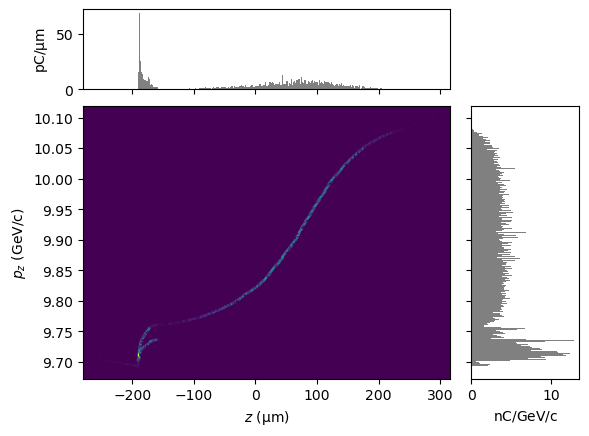

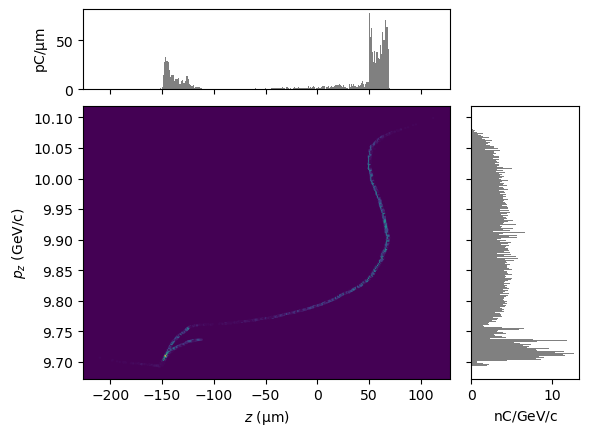

In [14]:
P = getBeamAtElement(tao, "BEGBC20")
display(plotMod(P, 'z', 'pz', bins=300))
P = getBeamAtElement(tao, "PENT")
display(plotMod(P, 'z', 'pz', bins=300))
plt.clf()

In [15]:
P

<ParticleGroup with 10000 particles at 0x160b5b9d0>